In [37]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine, load_breast_cancer

wine1 = load_wine()
i = wine1.feature_names
wine_Y = wine1.target
wine = pd.DataFrame(data=wine1.data, columns=wine1.feature_names)

breast_cancer = load_breast_cancer()
b = breast_cancer.feature_names
breast_cancer_Y = breast_cancer.target
breast_cancer = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)

ionosphere=pd.read_csv('https://raw.githubusercontent.com/hargurjeet/MachineLearning/Ionosphere/ionosphere_data.csv')
ionosphere.rename(columns={'column_ai':'target'}, inplace=True)
# print(ionosphere)

wine_X = wine[i]
breast_cancer_X = breast_cancer[b]
ionosphere_X = ionosphere.drop(['target'], axis=1)
ionosphere_Y = ionosphere.target

In [38]:
print(wine_X.shape)
print(np.array(wine_X).ravel().shape)
print(wine_Y.shape)

(178, 13)
(2314,)
(178,)


## Hyperparameter tuning for Wine dataset

In [39]:
from hmmlearn import hmm
from hmmlearn.hmm import GMMHMM
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from itertools import product
import numpy as np
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

algorithm_values = ['viterbi']  # Choose the appropriate algorithm
random_state_values = [42]  # Set to None or an integer value for reproducibility
n_iter_values = [10,150, 200, 300, 500]  # Adjust the number of iterations as needed
tol_values = [1e-3, 1e-4, 1e-5, 1e-6]  # Tolerance threshold for convergence
covariance_type_values = ['spherical']  # Adjust covariance types
init_params_values = ['mw']      # Vary initialization parameters
# implementation_values = ['log','scaling'] #Choose the forward-backward algorithm
test_size_values = [0.1,0.2,0.3,0.4]


best_model = None
best_score = float('-inf')
best_train_test_ratio = 0.0
best_param_list = []
best_pred_y = 0
best_test_y = 0
i = 0



for algo_type,random_state,n_iter,covariance_type,tol,test_size,init_params in product(algorithm_values, random_state_values, n_iter_values, covariance_type_values,tol_values,test_size_values, init_params_values):
    print(i)
    i = i + 1
    train_X, test_X, train_y, test_y = train_test_split(wine_X,wine_Y,random_state=random_state,test_size=test_size)
    model = hmm.GMMHMM(n_components=3,random_state=random_state,covariance_type=covariance_type,init_params=init_params)
    model.startprob_ = np.array([0.6,0.3,0.1])
    model.transmat_ = np.array([[0.7,0.2,0.1],[0.3,0.5,0.2],[0.3,0.3,0.4]])
#     model.covars_ = np.tile(np.identity(13), (3,1,1,))
    train_X = sc.fit_transform(train_X)
    test_X = sc.transform(test_X)
    model.fit(train_X,)
    pred_y = model.predict(test_X)
    score = accuracy_score(test_y,pred_y)

    if score > best_score:
        best_score = score
        best_train_test_ratio = test_size
        best_model = model
        best_param_list = [3,algo_type,random_state,n_iter,covariance_type,tol]
        best_pred_y = pred_y
        best_test_y = test_y

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79


Best Parameter Values: 

[3, 'viterbi', 42, 10, 'spherical', 0.001]


Best Ratio:0.2


              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00         8

    accuracy                           0.33        36
   macro avg       0.33      0.29      0.31        36
weighted avg       0.39      0.33      0.36        36

Confusion Matrix: 

[[12  1  1]
 [ 0  0 14]
 [ 0  8  0]]




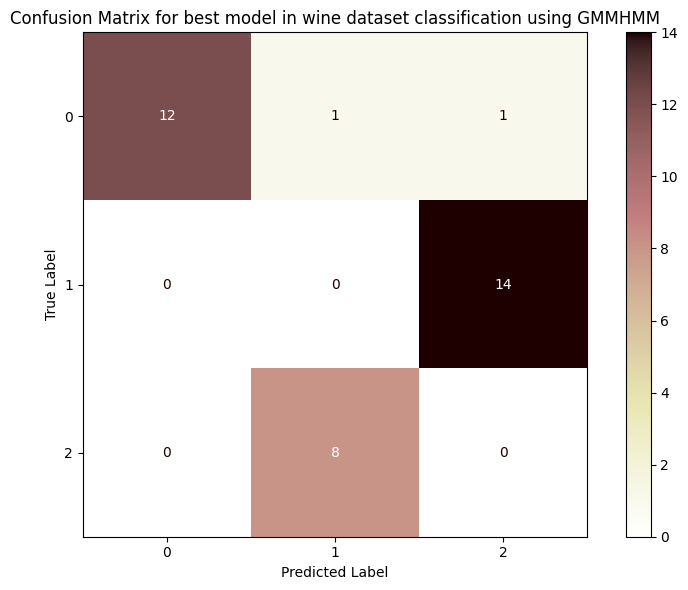

In [40]:
cm = confusion_matrix(best_test_y, best_pred_y)
print("Best Parameter Values: \n")
print(best_param_list)
print("\n")
print("Best Ratio:" + str(best_train_test_ratio))
print("\n")
print(classification_report(best_test_y,best_pred_y))
print("Confusion Matrix: \n")
print(cm)
print("\n")

fig, ax = plt.subplots(figsize=(8, 6))
cm_display = (ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2]))
cm_display.plot(ax=ax, cmap='pink_r', values_format='d')
  # Add a title and labels
ax.set_title('Confusion Matrix for best model in wine dataset classification using GMMHMM')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

plt.tight_layout()
  # Show the Confusion Matrix
plt.show()

## Hyperparameter tuning for Breast Cancer dataset

In [54]:
state_range_values = [2]
algorithm_values = ['viterbi']  # Choose the appropriate algorithm
random_state_values = [42]  # Set to None or an integer value for reproducibility
n_iter_values = [150, 200, 300, 500]  # Adjust the number of iterations as needed
tol_values = [1e-3, 1e-4, 1e-5, 1e-6]  # Tolerance threshold for convergence
covariance_type_values = ['spherical']  # Adjust covariance types
init_params_values = ['mw']      # Vary initialization parameters
implementation_values = ['log','scaling'] #Choose the forward-backward algorithm
test_size_values = [0.1,0.2,0.3,0.4]


best_model = None
best_score = float('-inf')
best_train_test_ratio = 0.0
best_param_list = []
best_pred_y = 0
best_test_y = 0

for num_of_states,algo_type,random_state,n_iter,covariance_type,tol,test_size,init_params,implementation in product(state_range_values,algorithm_values, random_state_values, n_iter_values, covariance_type_values,tol_values,test_size_values, init_params_values,implementation_values):
    train_X, test_X, train_y, test_y = train_test_split(breast_cancer_X,breast_cancer_Y,random_state=None,test_size=test_size)
    model = hmm.GMMHMM(n_components=2,algorithm=algo_type,random_state=random_state,n_iter=n_iter, covariance_type=covariance_type, tol=tol,)
#     model.startprob_ = np.array([0.6,0.3,0.1])
#     model.transmat_ = np.array([[0.7,0.2,0.1],[0.3,0.5,0.2],[0.3,0.3,0.4]])
#     model.covars_ = np.tile(np.identity(13), (3,1,1,))
    train_X = sc.fit_transform(train_X)
    test_X = sc.transform(test_X)
    model.fit(train_X)
    pred_y = model.predict(np.array(test_y).reshape(-1,1))
    score = accuracy_score(test_y,pred_y)

    if score >= best_score and len(set(pred_y)) == 2:
        best_score = score
        best_train_test_ratio = test_size
        best_model = model
        best_param_list = [num_of_states,algo_type,random_state,n_iter,covariance_type,tol]
        best_pred_y = pred_y
        best_test_y = test_y

592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719


Best Parameter Values: 

[2, 'viterbi', 42, 500, 'spherical', 1e-06]


Best Ratio:0.4


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       1.00      1.00      1.00       139

    accuracy                           1.00       228
   macro avg       1.00      1.00      1.00       228
weighted avg       1.00      1.00      1.00       228

Confusion Matrix: 

[[ 89   0]
 [  0 139]]




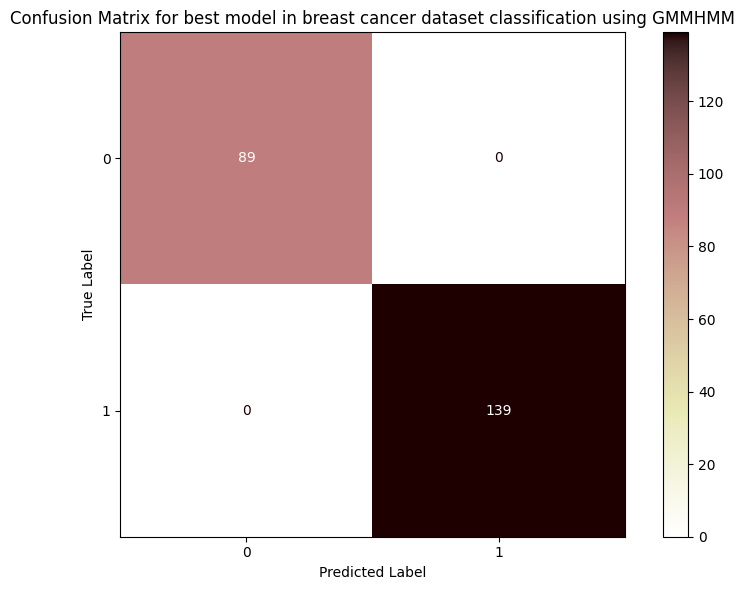

In [56]:
cm = confusion_matrix(best_test_y, best_pred_y)
print("Best Parameter Values: \n")
print(best_param_list)
print("\n")
print("Best Ratio:" + str(best_train_test_ratio))
print("\n")
print(classification_report(best_test_y,best_pred_y))
print("Confusion Matrix: \n")
print(cm)
print("\n")

fig, ax = plt.subplots(figsize=(8, 6))
cm_display = (ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1]))
cm_display.plot(ax=ax, cmap='pink_r', values_format='d')
  # Add a title and labels
ax.set_title('Confusion Matrix for best model in breast cancer dataset classification using GMMHMM')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

plt.tight_layout()
  # Show the Confusion Matrix
plt.show()

In [61]:
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from hmmlearn.hmm import GaussianHMM
from itertools import product

state_range_values = [2]
algorithm_values = ['viterbi']  # Choose the appropriate algorithm
random_state_values = [None]  # Set to None or an integer value for reproducibility
n_iter_values = [250, 300, 500, 750]  # Adjust the number of iterations as needed
tol_values = [1e-4, 1e-5, 1e-6, 1e-7]  # Tolerance threshold for convergence
covariance_type_values = ['spherical']  # Adjust covariance types
test_size_values = [0.1,0.2,0.3,0.4]



best_model = None
best_score = float('-inf')
best_train_test_ratio = 0.0
best_param_list = []
best_pred_y = 0
best_test_y = 0

ionosphere_Y_changed = []
for y in ionosphere_Y:
    if y == 'b':
        ionosphere_Y_changed.append(0)
    else:
        ionosphere_Y_changed.append(1)

for num_of_states,algo_type,random_state,n_iter,covariance_type,tol,test_size in product(state_range_values,algorithm_values, random_state_values, n_iter_values, covariance_type_values,tol_values,test_size_values):


    # model = CustomHMM(num_of_states,implement_type,algo_type,random_state,n_iter,tol)
    # X=1
    # test_y,pred_y, score = model.fit(X,lengths=test_size)
    train_X, test_X, train_y, test_y = train_test_split(ionosphere_X,ionosphere_Y_changed,random_state=42,test_size=test_size)
    model = hmm.GMMHMM(n_components=2,algorithm=algo_type,random_state=random_state,n_iter=n_iter, covariance_type=covariance_type, tol=tol, init_params='mw')
    model.fit(ionosphere_X)

    pred_y = model.predict(test_X)
    score = accuracy_score(test_y,pred_y)

    if score >= best_score:
        best_score = score
        best_train_test_ratio = test_size
        best_model = model
        best_param_list = [num_of_states,algo_type,random_state,n_iter,covariance_type,tol]
        best_pred_y = pred_y
        best_test_y = test_y

Best Parameter Values: 

[2, 'viterbi', None, 750, 'spherical', 1e-05]


Best Ratio:0.1


              precision    recall  f1-score   support

           0       0.64      0.93      0.76        15
           1       0.93      0.62      0.74        21

    accuracy                           0.75        36
   macro avg       0.78      0.78      0.75        36
weighted avg       0.81      0.75      0.75        36

Confusion Matrix: 

[[14  1]
 [ 8 13]]




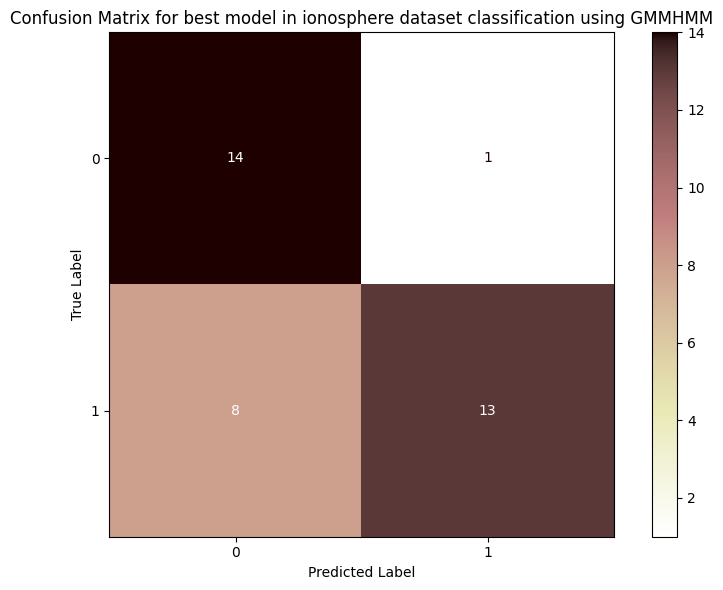

In [62]:
cm = confusion_matrix(best_test_y, best_pred_y)
print("Best Parameter Values: \n")
print(best_param_list)
print("\n")
print("Best Ratio:" + str(best_train_test_ratio))
print("\n")
print(classification_report(best_test_y,best_pred_y))
print("Confusion Matrix: \n")
print(cm)
print("\n")

fig, ax = plt.subplots(figsize=(8, 6))
cm_display = (ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1]))
cm_display.plot(ax=ax, cmap='pink_r', values_format='d')
  # Add a title and labels
ax.set_title('Confusion Matrix for best model in ionosphere dataset classification using GMMHMM')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

plt.tight_layout()
  # Show the Confusion Matrix
plt.show()